## Part 1.1

In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from collections import deque
import itertools

In [209]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

In [210]:
TCS = pd.read_csv('tcs_stock.csv',index_col=0, parse_dates=[0] ,date_parser=parser)
INFY = pd.read_csv('infy_stock.csv',index_col=0, parse_dates=[0] ,date_parser=parser)
NIFTY = pd.read_csv('nifty_it_index.csv', index_col=0, parse_dates=[0] ,date_parser=parser)

In [211]:
TCS

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724
2015-01-08,TCS,EQ,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759
2015-01-09,TCS,EQ,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415
2015-01-12,TCS,EQ,2512.30,2517.00,2528.00,2480.25,2527.95,2509.70,2497.82,798003,1.993266e+14,58810,451228,0.5654
2015-01-13,TCS,EQ,2509.70,2520.00,2530.40,2480.10,2498.00,2497.90,2509.40,734216,1.842440e+14,49993,386133,0.5259


### 1. Create 4,16,....,52 week moving average(closing price) for each stock and index. This should happen through a function.

In [212]:
def moving_average(iterable, window):
    it = iter(iterable)
    d = deque(itertools.islice(it, window-1))
    d.appendleft(0)
    s = sum(d)
    for elem in it:
        s += elem - d.popleft()
        d.append(elem)
        yield s / float(window)

# Append null to first (window - 1) steps because we dont have points to calculate
# average till that point 
def return_window_average(iterable, window):
    res = [None for i in range(window-1)]
    res.extend(list(moving_average(iterable, window)))
    return res

In [213]:
def append_mov_avg_col(data):   #This will add a column of moving avg 
    days = [20, 80, 140, 200, 248]     # 4*5,16*5,28*5 and so on.And 248 is because shape is 248
    Col_name=['4_week','16_week','28_week','40_week','52_week']
    for (c,d) in zip(Col_name, days):
        data[c] = return_window_average(data['Close'], d)      

In [214]:
append_mov_avg_col(TCS)
append_mov_avg_col(INFY)
append_mov_avg_col(NIFTY)
NIFTY

,Open,High,Low,Close,Volume,Turnover,4_week,16_week,28_week,40_week,52_week
Date,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,NaN,NaN,NaN,NaN,NaN
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,NaN,NaN,NaN,NaN,NaN
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,NaN,NaN,NaN,NaN,NaN
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,NaN,NaN,NaN,NaN,NaN
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,NaN,NaN,NaN,NaN,NaN
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,NaN,NaN,NaN,NaN,NaN
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,NaN,NaN,NaN,NaN,NaN
2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,NaN,NaN,NaN,NaN,NaN
2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,NaN,NaN,NaN,NaN,NaN


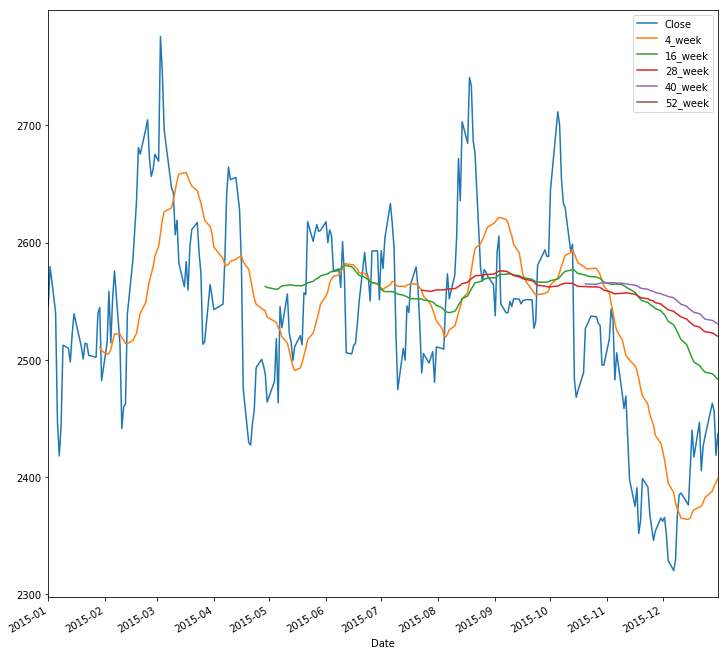

In [215]:
TCS[['Close','4_week','16_week','28_week','40_week','52_week']].plot(kind='line')
plt.show()

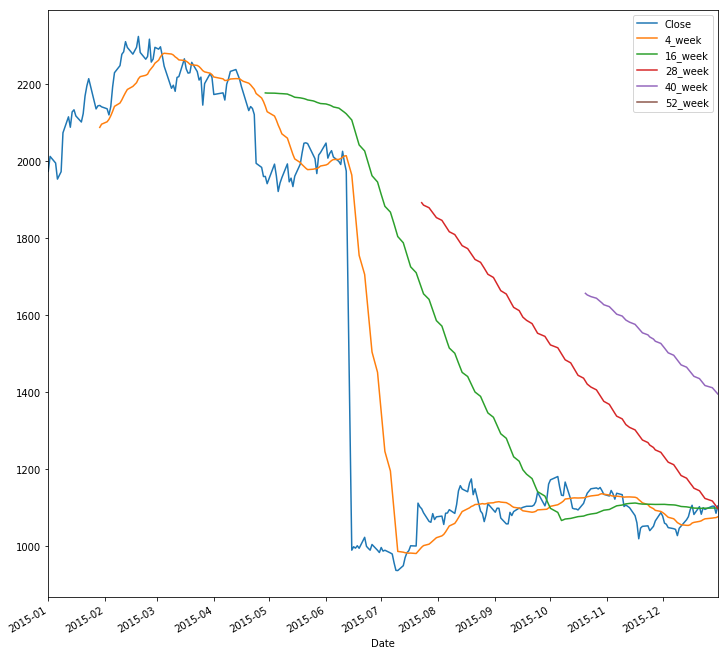

In [216]:
INFY[['Close','4_week','16_week','28_week','40_week','52_week']].plot(kind='line')
plt.show()

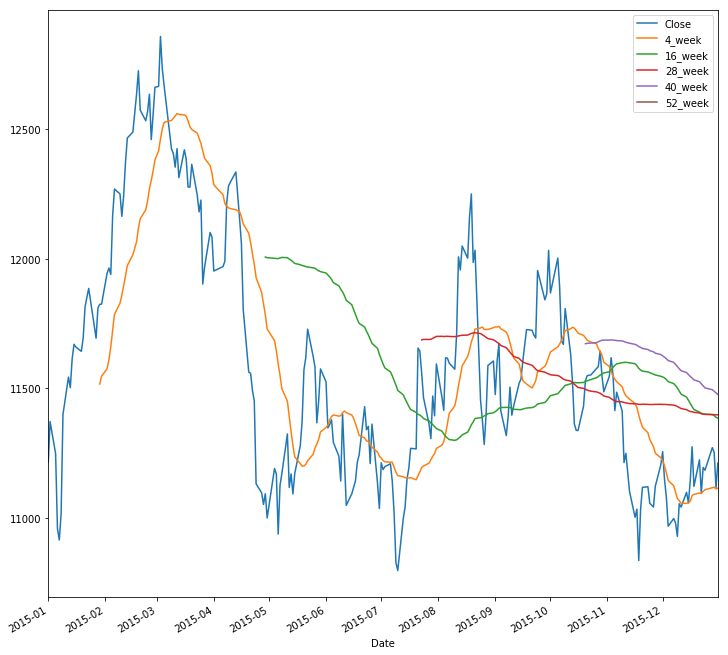

In [217]:
NIFTY[['Close','4_week','16_week','28_week','40_week','52_week']].plot(kind='line')
plt.show()

## Part 1.2 Create rolling window

In [218]:
TCS = TCS.asfreq('D', method ='pad')        
INFY = INFY.asfreq('D', method ='pad')
NIFTY = NIFTY.asfreq('D', method ='pad')


In [221]:
def rolling_window(data):
    data['rolling_window_10'] = data[['Close']].rolling(window=10).mean()
    data['rolling_window_75'] = data[['Close']].rolling(window=75).mean()
    data[['Close','rolling_window_10','rolling_window_75']].plot()
    
    plt.show()

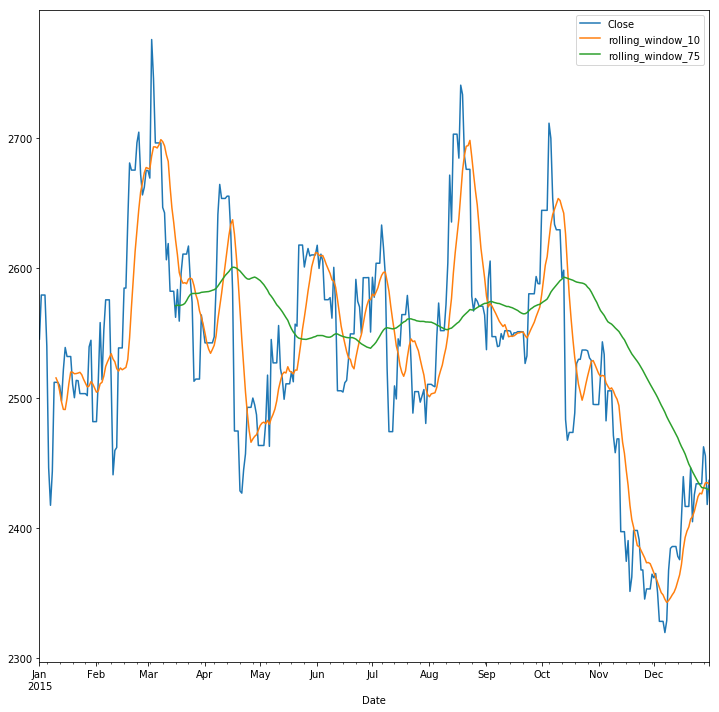

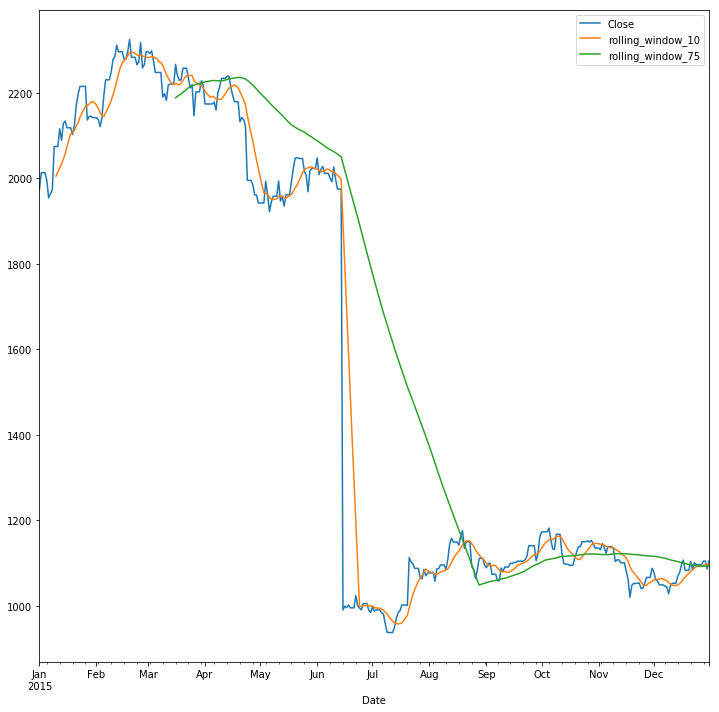

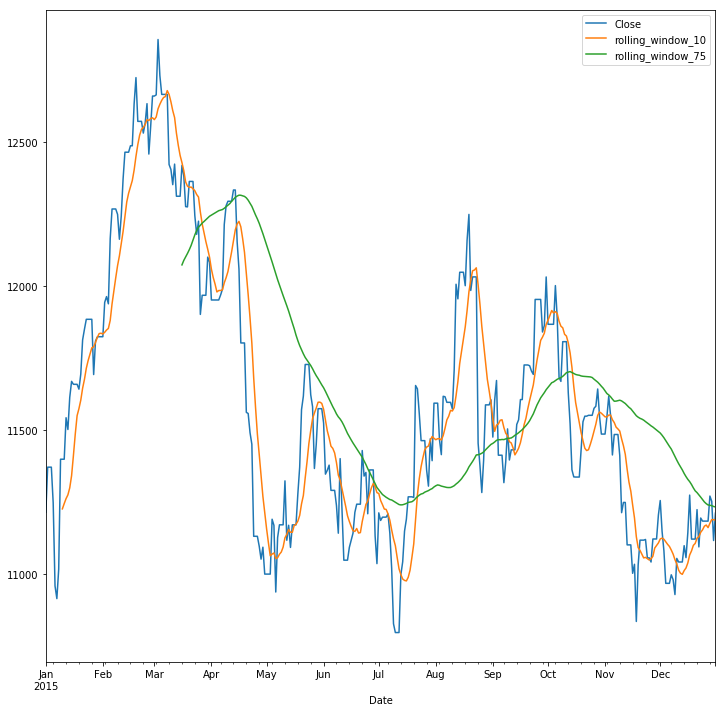

In [222]:
rolling_window(TCS)
rolling_window(INFY)
rolling_window(NIFTY)

## Part 1.3. Create the following dummy time series

In [223]:
def vol_shock_direction(data):
    
    data_volume = data[['Volume']].pct_change()
    volume_shock = data_volume.Volume.apply(lambda x: 1 if abs(x*100) > 10 else 0)
    # 1 if change greater than 10%
    volume_shock = volume_shock.rename('volume_shock')
    volume_direction = data_volume.Volume.apply(lambda x: 1 if x >= 0 else 0)
    # 1 if change is +ve or no change
    volume_direction = volume_direction.rename('volume_direction')
    data['volume_shock']=volume_shock
    data['volume_direction']=volume_direction


In [224]:
vol_shock_direction(TCS)
vol_shock_direction(INFY)
vol_shock_direction(NIFTY)

In [225]:
TCS

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,%Deliverble,4_week,16_week,28_week,40_week,52_week,rolling_window_10,rolling_window_75,volume_shock,volume_direction
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,...,0.2883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,0.6683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2015-01-03,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,0.6683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2015-01-04,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,0.6683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,...,0.5207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,...,0.5894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,...,0.6724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2015-01-08,TCS,EQ,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,...,0.5759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2015-01-09,TCS,EQ,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,...,0.5415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [226]:
def price_shocks(data):
    data["price_t+1"] = data.Close.shift(1) 
    data["price_shock"] = (abs((data["price_t+1"] - data["Close"])/data["Close"]*100)  > 2).astype(int)
    data["price_black_swan"] = data['price_shock'] 
    return data.head(10)

In [227]:
price_shocks(TCS)
price_shocks(INFY)
price_shocks(NIFTY)

,Open,High,Low,Close,Volume,Turnover,4_week,16_week,28_week,40_week,52_week,rolling_window_10,rolling_window_75,volume_shock,volume_direction,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,11215.70,0,0
2015-01-03,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,11372.10,0,0
2015-01-04,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,11372.10,0,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,11372.10,0,0
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,11248.55,1,1
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,10959.90,0,0
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,10916.00,0,0
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,11018.15,1,1


In [231]:
def price_shock_wo_vol_shock(data):
    
    data["not_vol_shock"]  = (~(data["volume_shock"].astype(bool))).astype(int)
    data["price_shock_w/0_vol_shock"] = data["not_vol_shock"] & data["price_shock"]
    
    return data.head(10)

In [232]:
price_shock_wo_vol_shock(TCS)
price_shock_wo_vol_shock(INFY)
price_shock_wo_vol_shock(NIFTY)

,Open,High,Low,Close,Volume,Turnover,4_week,16_week,28_week,40_week,52_week,rolling_window_10,rolling_window_75,volume_shock,volume_direction,price_t+1,price_shock,price_black_swan,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,1,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,11215.70,0,0,0,0
2015-01-03,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,11372.10,0,0,1,0
2015-01-04,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,11372.10,0,0,1,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,11372.10,0,0,0,0
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,11248.55,1,1,0,0
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,10959.90,0,0,0,0
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,10916.00,0,0,0,0
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,11018.15,1,1,0,0


## Part 2 (data visualization )

In [235]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.palettes import Blues9
from bokeh.palettes import RdBu3
from bokeh.models import ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper
from bokeh.palettes import Spectral11

In [236]:
output_notebook()

Loading BokehJS ...

2. Color timeseries in simple blue color.

In [241]:
TCS.name = 'TCS'
INFY.name = 'INFY'
NIFTY.name = 'NIFTY_IT'

In [242]:
def bokeh_plot(stock):
    data = dict(stock=stock['Close'], Date=stock.index)
    
    p = figure(plot_width=800, plot_height=250,  title = 'time series for {}' .format(stock.name), x_axis_type="datetime")
    p.line(stock.index, stock['Close'], color='blue', alpha=0.5)
    
    #show price shock w/o vol shock
    
    p.circle(stock.index, stock.Close*stock["price_shock_w/0_vol_shock"], size=4, legend='price shock without vol shock')
    show(p)

In [243]:
output_file("timeseries.html")

bokeh_plot(TCS)
bokeh_plot(INFY)
bokeh_plot(NIFTY)

In [291]:
def add_date_col(stock):
    stock['Date']=stock.index
    

In [292]:
add_date_col(TCS)
add_date_col(INFY)
add_date_col(NIFTY)

3. Color timeseries between two volume shocks in a different color (Red)

In [296]:
output_file("datetime.html")
p.line(TCS['Date'], TCS['volume_shock'], color='navy', alpha=0.5, line_color="red")
p.line(NIFTY['Date'], NIFTY['volume_shock'], color='navy', alpha=0.5,line_color="red")
show(p)

FileNotFoundError: [Errno 2] No such file or directory: 'plots/volume_shock.html'

4. Gradient color in blue spectrum based on difference of 52 week moving average.

In [312]:
def plot4(data):
    x = data.Date
    y = data['52_week']
    p.line(x, y, legend="Closing Price ")
    p.line(x, y=0.0, line_color='black', line_width=1.5)
    p.legend.location = "top_right"
    p.xaxis.axis_label = 'Date'
    p.yaxis.axis_label = '52 Week moving average difference'
    show(p)
     

In [313]:
plot4(TCS)

FileNotFoundError: [Errno 2] No such file or directory: 'plots/volume_shock.html'

5. Mark closing Pricing shock without volume shock to identify volumeless price movement.

In [319]:
def plot5(data): 
        p.line(data['Date'], data.Close, legend="Closing Price ", line_color="blue", line_width=1)
        p.scatter(data.Date.loc[data['price_shock_w/0_vol_shock'] == True],
                  data.Close.loc[data['price_shock_w/0_vol_shock'] == True],
                  legend="Pricing shock w/o Volume shock" ,
                  line_color="red",
                  line_width=1)

        p.legend.location = "top_right"
        p.xaxis.axis_label = 'Date'
        p.yaxis.axis_label = 'Closing Price'
        show(p)

In [320]:
TCS.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', '4_week', '16_week', '28_week', '40_week', '52_week',
       'rolling_window_10', 'rolling_window_75', 'volume_shock',
       'volume_direction', 'price_t+1', 'price_shock', 'price_black_swan',
       'not_vol_shock', 'price_shock_w/0_vol_shock', 'Date'],
      dtype='object')

In [321]:
plot5(TCS)

FileNotFoundError: [Errno 2] No such file or directory: 'plots/volume_shock.html'

6. Hand craft partial autocorrelation plot for each stock/index on upto all lookbacks on bokeh

In [244]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format(stock.name))

    partial_autocorr = pacf(stock["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [245]:
output_file("PACF.html")

draw_pacf(TCS)
draw_pacf(INFY)
draw_pacf(NIFTY)